In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import urllib
from PIL import Image
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pickle
movie_df = pd.read_csv("shuffled_movie_df.csv")
pickle.dump(movie_df, open("shuffled_movie_df.pkl", "wb"))
pickle_movie = pickle.load(open("shuffled_movie_df.pkl", "rb"))
movie_df.head()
pickle_movie.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller


In [5]:
movie_df["Plot Keywords"].fillna("",inplace=True)

# Introduction to the File:
In this file, we use build a machine learning model with the Tfidf on text of Synopsis and also Tfidf on text of Plot Key Words as features to predict the movie Genre. We try to find the optimal k value for such a model.

#### NOTE:  <br>"Genre Variations" is a column containing all the genres of the movie since the movie can have multiple genres. <br> "Genre" is the most prominent genre of the movie i.e. for example, a movie can be more sci-fi than it is horror such as the movie "Alien"). Hence, we made our own function for finding accuracy and F1 scores.<br> For us, the machine learning model predicts "correctly" if the genre it predicts matches one of the genres from the "Genre Variations" column in the data frame. Hence, we made our own Accuracy function and F1 Score function to reflect this.


####  NOTE: this model we explore here is different from the model we create in ML_1 in that we use another cv value in cross validation on our model using tfidf on text from Synopsis to find another good k value. in ML_4, we combine both models models using tfidf on text from Synopsis with two different optimal k values we found.

#### NOTE: in this file, we deal with test/validation accuracy and test/validation f1 score, not training metrics for classifiers.

# Model using TFIDF on Plot Key Words text :

###### Finding which k value optimizes Accuracy
K = 1 optimizes Accuracy giving an accuracy score of 56.6%.

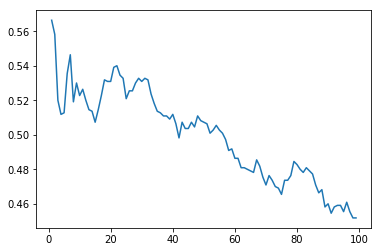

In [6]:
def getAccuracy(k):
    vec = TfidfVectorizer()
    vec.fit(movie_df["Plot Keywords"])
    X_train = vec.transform(movie_df["Plot Keywords"])
    y_train =  movie_df["Genre"]
    y_all_genres = movie_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k, metric = "cosine")
    #pipeline = Pipeline([("scaler", scaler), ("model", model)])
    pipeline = Pipeline([("model", model)])
    #cv = ShuffleSplit(n_splits=10, test_size=0.01, random_state=0)
    predicted = cross_val_predict(model, X_train, y_train, cv=10)

    #print(len(list(y_train)))
    #print(len(list(predicted)))
    #list(predicted)

    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    accuracy = 0
    accuracy1 = 0
    for i in range(0, len(predicted), 1):
        if predicted[i] in  y_genres_list[i]:
            accuracy += 1
    return accuracy/len(y_all_genres)
  
ks = pd.Series(range(1, 100,1))
ks.index = range(1, 100,1)
test_errs = ks.apply(getAccuracy)

test_errs.plot.line()

In [7]:
test_errs.sort_values()[-10:]

29    0.532727
31    0.532727
24    0.532727
23    0.534545
6     0.535455
21    0.539091
22    0.540000
7     0.546364
2     0.558182
1     0.566364
dtype: float64

###### Finding k value that optmizes F1 score for Each Genre

Horror
0.4298245614035088
12    0.393013
10    0.396396
11    0.398230
13    0.398305
15    0.410480
16    0.414097
19    0.418803
14    0.419214
17    0.421053
18    0.429825
dtype: float64

Western
0.6736842105263158
4     0.640449
16    0.644550
19    0.650000
12    0.653659
13    0.656863
17    0.657005
6     0.663158
11    0.663462
18    0.666667
7     0.673684
dtype: float64

War
0.47887323943661975
18    0.451613
13    0.457516
11    0.463576
12    0.463576
10    0.463576
7     0.464789
14    0.469799
6     0.472222
9     0.476190
8     0.478873
dtype: float64

Sci-Fi
0.548494983277592
12    0.518771
11    0.524138
14    0.534247
10    0.534722
19    0.541806
18    0.543624
15    0.544218
9     0.546075
17    0.546667
16    0.548495
dtype: float64

Action
0.4618556701030928
9     0.298165
8     0.298851
10    0.304850
6     0.331126
1     0.341837
7     0.347826
5     0.368317
4     0.381132
3     0.418079
2     0.461856
dtype: float64

Adventure
0.4552429667519182
7     0.33933

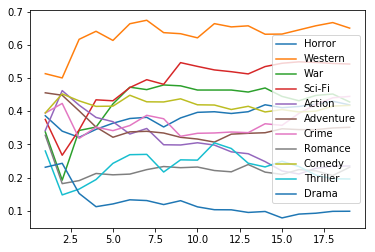

In [8]:
def getF1(k,genre):
    vec = TfidfVectorizer()
    vec.fit(movie_df["Plot Keywords"])
    X_train = vec.transform(movie_df["Plot Keywords"])
    y_train =  movie_df["Genre"]
    y_all_genres = movie_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k, metric = "cosine")

    pipeline = Pipeline([("model", model)])
    predicted = cross_val_predict(pipeline, X_train, y_train, cv=10)

    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    cur_genre = genre
    precision_denominator = 0
    recall_denominator = 0
    true_positives = 0
    
    for i in range(0, len(predicted), 1):
        if predicted[i] == cur_genre and cur_genre in y_genres_list[i]:
               true_positives += 1
        if predicted[i] == cur_genre:
            precision_denominator += 1
        if cur_genre in y_genres_list[i]:
            recall_denominator += 1
    precision = true_positives / precision_denominator
    recall =  true_positives / recall_denominator
    
    return (2 * precision * recall / (precision + recall))
genres=["Horror","Western","War","Sci-Fi","Action","Adventure",
       "Crime","Romance","Comedy","Thriller","Drama"]
def getBestKVals():
    for genre in genres:
        ks = pd.Series(range(1, 20,1))
        ks.index = range(1, 20,1)
        test_errs = ks.apply(getF1,args=(genre,))
        print(genre)
        print(test_errs.max())
        print(test_errs.sort_values()[-10:])
        test_errs.plot.line(legend=True,label=genre)
        print()

getBestKVals()

### Conclusion on optimal k value to use with model using TFIDF on Plot Key Words text
For each genre, we printed the top 10 F1 scores and the k-value associated with them. We notcied that k = 6 constantly produced decent F1 scores for all the genres. K = 6 also returns an accuracy score of 53.5% which is close to 56.6%, the highest accuracy with k = 1. Hence, we chose k = 6 to be our overall optimal k value to use for this machine learning model. 

Below are the f1 score values for each genre with k = 6 along with accuracy with K = 6.

In [12]:
for genre in genres:
    print(genre)
    print(getF1(6,genre))

print("accuracy: "+ str(getAccuracy(6)))

Horror
0.37788018433179726
Western
0.6631578947368422
War
0.4722222222222222
Sci-Fi
0.4710144927536232
Action
0.3311258278145695
Adventure
0.33766233766233766
Crime
0.35672514619883045
Romance
0.21052631578947367
Comedy
0.44785276073619634
Thriller
0.2689655172413793
Drama
0.13314447592067988
accuracy: 0.5354545454545454


# Model using TFIDF on Synopsis text :

###### Finding which k value optimizes Accuracy
K = 1 optimizes Accuracy giving an accuracy score of 55.2%.

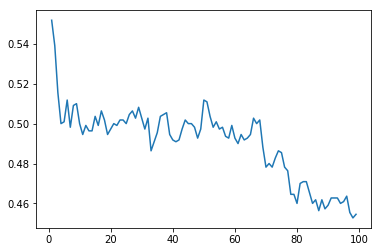

In [16]:
def getAccuracy(k):
    vec = TfidfVectorizer()
    vec.fit(movie_df["Synopsis"])
    X_train = vec.transform(movie_df["Synopsis"])
    y_train =  movie_df["Genre"]
    y_all_genres = movie_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k, metric = "cosine")
    #pipeline = Pipeline([("scaler", scaler), ("model", model)])
    pipeline = Pipeline([("model", model)])
    #cv = ShuffleSplit(n_splits=10, test_size=0.01, random_state=0)
    predicted = cross_val_predict(model, X_train, y_train, cv=10)

    #print(len(list(y_train)))
    #print(len(list(predicted)))
    #list(predicted)

    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    accuracy = 0
    accuracy1 = 0
    for i in range(0, len(predicted), 1):
        if predicted[i] in  y_genres_list[i]:
            accuracy += 1
    return accuracy/len(y_all_genres)
  
ks = pd.Series(range(1, 100,1))
ks.index = range(1, 100,1)
test_errs = ks.apply(getAccuracy)

test_errs.plot.line()

In [17]:
test_errs.sort_values()[-10:]

17    0.506364
29    0.508182
8     0.509091
9     0.510000
51    0.510909
50    0.511818
6     0.511818
3     0.515455
2     0.539091
1     0.551818
dtype: float64

###### Finding k value that optmizes F1 score for Each Genre

Horror
0.4530386740331491
11    0.415929
8     0.420561
13    0.424242
12    0.425000
3     0.426230
17    0.426778
10    0.427948
18    0.429752
2     0.447489
4     0.453039
dtype: float64

Western
0.5617977528089888
13    0.477273
10    0.485207
12    0.485549
11    0.497110
14    0.502857
15    0.508671
16    0.519774
18    0.539326
17    0.550562
19    0.561798
dtype: float64

War
0.42857142857142855
6     0.389937
12    0.390244
19    0.395480
13    0.397590
16    0.400000
15    0.407186
18    0.416667
9     0.423077
14    0.423529
17    0.428571
dtype: float64

Sci-Fi
0.4592592592592593
13    0.419476
10    0.419476
11    0.422222
6     0.426357
15    0.437037
16    0.437037
19    0.437037
12    0.437736
18    0.456929
17    0.459259
dtype: float64

Action
0.4753747323340472
10    0.348235
12    0.365796
7     0.373576
8     0.377622
9     0.381176
6     0.417204
4     0.445759
5     0.452675
3     0.473896
2     0.475375
dtype: float64

Adventure
0.4473684210526316
7     0.3282

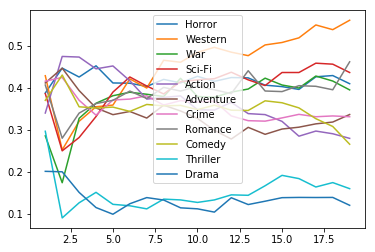

In [18]:
def getF1(k,genre):
    vec = TfidfVectorizer()
    vec.fit(movie_df["Synopsis"])
    X_train = vec.transform(movie_df["Synopsis"])
    y_train =  movie_df["Genre"]
    y_all_genres = movie_df["Genre Variations"]
    model = KNeighborsClassifier(n_neighbors=k, metric = "cosine")

    pipeline = Pipeline([("model", model)])
    predicted = cross_val_predict(pipeline, X_train, y_train, cv=10)

    y_genres_list = list(y_all_genres)
    y_train_list = list(y_train)
    predicted_list = list(predicted)

    cur_genre = genre
    precision_denominator = 0
    recall_denominator = 0
    true_positives = 0
    
    for i in range(0, len(predicted), 1):
        if predicted[i] == cur_genre and cur_genre in y_genres_list[i]:
               true_positives += 1
        if predicted[i] == cur_genre:
            precision_denominator += 1
        if cur_genre in y_genres_list[i]:
            recall_denominator += 1
    precision = true_positives / precision_denominator
    recall =  true_positives / recall_denominator
    
    return (2 * precision * recall / (precision + recall))
genres=["Horror","Western","War","Sci-Fi","Action","Adventure",
       "Crime","Romance","Comedy","Thriller","Drama"]
def getBestKVals():
    for genre in genres:
        ks = pd.Series(range(1, 20,1))
        ks.index = range(1, 20,1)
        test_errs = ks.apply(getF1,args=(genre,))
        print(genre)
        print(test_errs.max())
        print(test_errs.sort_values()[-10:])
        test_errs.plot.line(legend=True,label=genre)
        print()

getBestKVals()

In [19]:
for genre in genres:
    print(genre)
    print(getF1(4,genre))
print("acc: ",getAccuracy(4))

Horror
0.4530386740331491
Western
0.35526315789473684
War
0.3636363636363636
Sci-Fi
0.331877729257642
Action
0.4457593688362919
Adventure
0.3524229074889868
Crime
0.33519553072625696
Romance
0.3629032258064517
Comedy
0.3522727272727273
Thriller
0.1509433962264151
Drama
0.11461318051575932
acc:  0.5


In [20]:
for genre in genres:
    print(genre)
    print(getF1(19,genre))
print("acc: ",getAccuracy(19))

Horror
0.4102564102564102
Western
0.5617977528089888
War
0.3954802259887006
Sci-Fi
0.437037037037037
Action
0.27979274611398963
Adventure
0.336734693877551
Crime
0.33146067415730335
Romance
0.4625850340136055
Comedy
0.26578073089701
Thriller
0.1597222222222222
Drama
0.12
acc:  0.49454545454545457


### Conclusion on optimal k value to use with model using TFIDF on Synopsis text
For each genre, we printed the top 10 F1 scores and the k-value associated with them. We noticed that K = 4 and K = 19 returned good F1 scores regularly for most genres. So, we narroed the k value down to these two number and printed the accuracy score and F1 scores for both K values. Also, both K = 19 and K = 4 returns an accuracy of around 50% which is not a lot less than the highest accuracy of 55% with k = 1. From these K value results, we concluded that K = 19 because it performed significantly better for a lot of genres such as Romance, Western, and Sci-Fi. 

Our goal is to find another K value that optimizes a model using TFIDF on Synopsis text and combine this model and the next model we create with another K value using the Ensembler technique. This is what we do in ML_3 and ML_4.
